# Assignment 2
### Understanding Uncertainty
### Due 9/12

In [1]:
import urllib.request
import os

def download_data(force=False):
    """Download and extract course data from Zenodo."""
    import urllib.request
    import zipfile
    import os
    
    zip_path = 'data.zip'
    data_dir = 'data'
    
    if not os.path.exists(zip_path) or force:
        print("Downloading course data...")
        urllib.request.urlretrieve(
            'https://zenodo.org/records/16954427/files/data.zip?download=1',
            zip_path
        )
        print("Download complete")
    
    if not os.path.exists(data_dir):
        print("Extracting data files...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(data_dir)
        print("Data extracted")
    
    return data_dir

download_data()

Download complete
Extracting data files...
Data extracted


'data'

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
iowa=pd.read_csv("data\iowa.csv")
iowa_header=iowa.head(0).T
iowa_header
iowa.info()

<>:1: SyntaxWarning: invalid escape sequence '\i'
<>:1: SyntaxWarning: invalid escape sequence '\i'
C:\Users\eglha\AppData\Local\Temp\ipykernel_21836\3957647078.py:1: SyntaxWarning: invalid escape sequence '\i'
  iowa=pd.read_csv("data\iowa.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159904 entries, 0 to 159903
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Invoice/Item Number  159904 non-null  object 
 1   Date                 159904 non-null  object 
 2   Store Number         159904 non-null  int64  
 3   Store Name           159904 non-null  object 
 4   Zip Code             159508 non-null  object 
 5   Category Name        159771 non-null  object 
 6   Vendor Name          159904 non-null  object 
 7   Item Number          159904 non-null  int64  
 8   Item Description     159904 non-null  object 
 9   Bottle Volume (ml)   159904 non-null  int64  
 10  State Bottle Cost    159904 non-null  float64
 11  State Bottle Retail  159904 non-null  float64
 12  Bottles Sold         159904 non-null  int64  
 13  Sale (Dollars)       159904 non-null  float64
dtypes: float64(3), int64(4), object(7)
memory usage: 17.1+ MB


# **1**

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

1. The most profitable item would be the item with the highest total profit. First, you would have to create an additional column called "profit" that subtracts the state bottle cost from the state bottle retail and then multiplies it by "Bottles Sold". Then you could groupby item number or item description and sum the new column called "Profit" to see which item has the highest profit.

This method of determining the most profitable item takes into consideration the amount of money required to sell the item, in addition to the price of the sale. It is incredibly important to consider when looking at examples like "Red Stag" whose total sales = $5.64 but their total profit is only $1.89. 

In [7]:
iowa["Total Profit"]=(iowa["State Bottle Retail"] -iowa["State Bottle Cost"])*iowa["Bottles Sold"]
iowa.head(10)

,Invoice/Item Number,Date,Store Number,Store Name,Zip Code,Category Name,Vendor Name,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Total Profit
0,INV-59108400026,06/06/2023,3723,J D SPIRITS LIQUOR,51040,STRAIGHT RYE WHISKIES,INFINIUM SPIRITS,27102,TEMPLETON RYE 4YR,750,18.09,27.14,2,54.28,18.10
1,S16879800057,01/16/2014,3926,LIQUOR DOWNTOWN / IOWA CITY,52240,VODKA 80 PROOF,HEAVEN HILL BRANDS,35416,BURNETT'S VODKA 80 PRF,750,4.84,7.26,12,87.12,29.04
2,INV-05301100019,06/05/2017,3829,GARY'S FOODS / MT VERNON,52314,CANADIAN WHISKIES,DIAGEO AMERICAS,11296,CROWN ROYAL,750,15.59,23.39,6,135.66,46.80
3,INV-40973500083,10/14/2021,5102,WILKIE LIQUORS,52314,AMERICAN SCHNAPPS,JIM BEAM BRANDS,82787,DEKUYPER BUTTERSHOTS,1000,7.87,11.81,12,141.72,47.28
4,INV-17022500013,01/18/2019,2560,HY-VEE FOOD STORE / MARION,52302,WHISKEY LIQUEUR,SAZERAC COMPANY INC,64863,FIREBALL CINNAMON WHISKEY,200,2.50,3.75,12,45.00,15.00
5,S32243000024,05/10/2016,5167,NEW STAR LIQUOR & TOBACCO / FT DODG,50501,IRISH WHISKIES,PERNOD RICARD USA/AUSTIN NICHOLS,15677,POWERS IRISH WHISKEY,1000,16.49,24.74,1,24.74,8.25
6,S16316700048,12/18/2013,2536,HY-VEE / PLEASANT HILL,50317,PUERTO RICO & VIRGIN ISLANDS RUM,"BACARDI U.S.A., INC.",43036,BACARDI GOLD RUM,750,7.54,11.31,12,135.72,45.24
7,INV-84044800086,06/30/2025,2637,HY-VEE #5 / DAVENPORT,52804,AMERICAN BRANDIES,SAZERAC COMPANY INC,55066,MR BOSTON BLACKBERRY BRANDY,750,5.00,7.50,12,90.00,30.00
8,INV-14344700002,09/10/2018,3611,LOGAN SUPER FOODS,51546,CANADIAN WHISKIES,JIM BEAM BRANDS,15246,WINDSOR CANADIAN,750,4.67,7.01,12,84.12,28.08
9,S08759700117,11/05/2012,2623,HY-VEE FOOD STORE #4 / SIOUX CITY,51104,SPICED RUM,DIAGEO AMERICAS,43334,CAPTAIN MORGAN SPICED RUM,375,4.50,6.74,6,40.44,13.44


Text(0.5, 1.0, "Iowa's Top 10 Most Profitable Liquors")

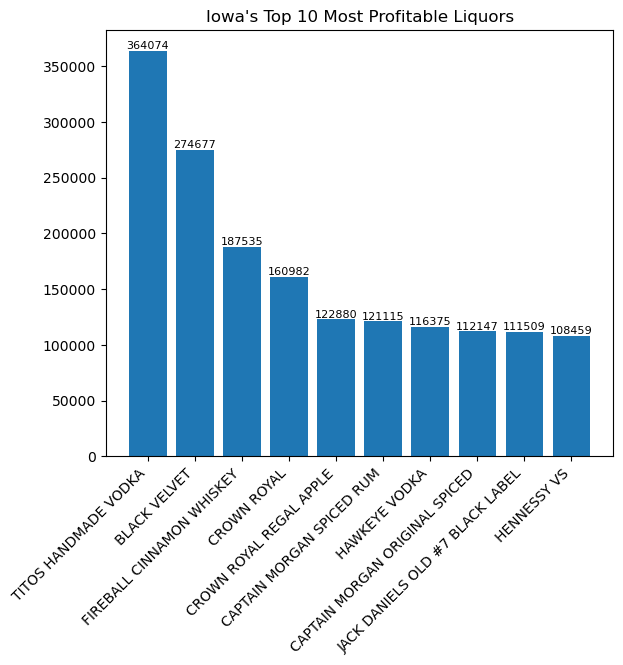

In [21]:
total_prof_by_item= iowa.groupby("Item Description")["Total Profit"].sum().sort_values(ascending=False)
top_10_prof= total_prof_by_item.head(10)
top_10_prof
plt.bar_label(plt.bar(top_10_prof.index, top_10_prof.values), fontsize=8)
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.title("Iowa's Top 10 Most Profitable Liquors")

In [11]:
iowa.groupby("Item Description")["Sale (Dollars)"].sum().sort_values(ascending=False)

Item Description
TITOS HANDMADE VODKA                1089534.02
BLACK VELVET                         817065.33
FIREBALL CINNAMON WHISKEY            562508.92
CROWN ROYAL                          482125.60
CROWN ROYAL REGAL APPLE              368257.76
                                       ...    
RED STAG                                  5.64
MALIBU SUNDAE MINI                        4.95
SEAGRAM'S PEACH TWISTED GIN MINI          4.95
ROMANA SAMBUCA HOLIDAY MINIS              3.00
OLD ELK 10YR WHEAT WHISKEY              -97.50
Name: Sale (Dollars), Length: 5401, dtype: float64

# **2**

2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

2. The difference between the first syntax and second is the shape of the array answers. They are the transpose of one another. 

x.reshape(-1,1) transforms the 1 row, 3 column array of x into a 3 row, 1 column array. For this example, the x.reshape(1,-1) maintains the same shape of x because the array already had only 1 column initially.

In [47]:
x.reshape(1,-1)

array([[1, 3, 5]])

In [22]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

In [24]:
x.reshape(-1,1) - y.reshape(1,-1)

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

In [25]:
x.reshape(1, -1) - y.reshape(-1,1)

array([[-1,  1,  3],
       [-4, -2,  0]])

In [40]:
def vector_subtract(x, y):
    diff_array=np.empty((len(x), len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            diff_array[i, j]= x[i]-y[j]
    return diff_array
vector_subtract(x, y)

array([[-1., -4.],
       [ 1., -2.],
       [ 3.,  0.]])

In [43]:
def vector_subtract2(x, y):
    diff_array=np.empty((len(y), len(x)))
    for i in range(len(y)):
        for j in range(len(x)):
            diff_array[i, j]= x[j]-y[i]
    return diff_array
vector_subtract2(x, y)

array([[-1.,  1.,  3.],
       [-4., -2.,  0.]])

# **3**

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ and 1 if $x \le z$ is true, or
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

- For $x = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

3.  Please see the plot below.

$ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$ because if x>z then the indicator function returns 0. When x<=z then the function returns 1, which, when subtracted from 1 equals 0. 

Please see 2nd plot below.

When the ECDF sample size increase, the proportion approaches 1, meaning as the number of items from the sample grows, they proportion included in the graph approaches 100%.


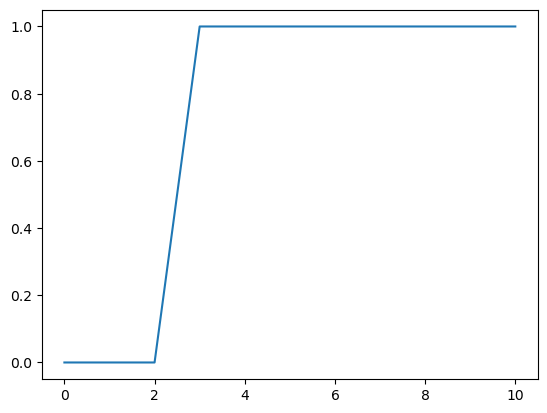

In [77]:
def indicator_function(x, z):
    returns=[]
    for i in range(len(z)):
        if x > i:
            returns.append(0)
        elif x <=i:
            returns.append(1)
    return returns
z= list(range(0,11))
x=3
indicator_function(x, z)

plt.plot(z, indicator_function(x, z))

In [51]:
np.unique(X)

array([-2.9185093 , -2.8220191 , -2.81406029, ...,  3.42680228,
        3.55786529,  3.56712031], shape=(3000,))

Text(0.5, 0, 'Value')

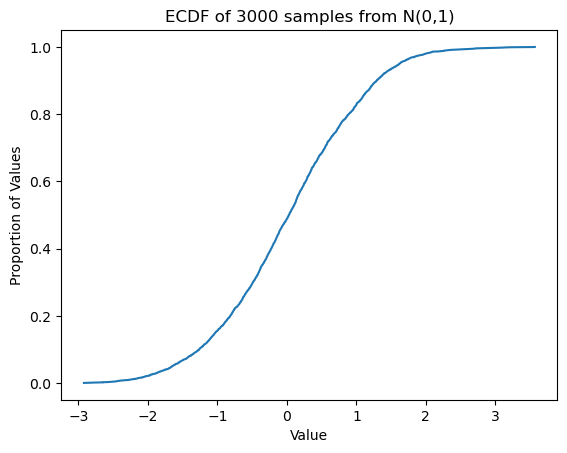

In [65]:
import numpy as np
import seaborn as sns

rng = np.random.default_rng(100)

for N in (3,30,300,3000):
    X = rng.normal(0,1,N)
    # ECDF plot goes here:
    
Z = np.sort(np.unique(X))
compare = X.reshape(-1,1) <= Z.reshape(1,-1)
ecdf=np.mean(compare, axis=0)

title_str= (f"ECDF of {N} samples from N(0,1)")
plt.plot(Z, ecdf)
plt.title(title_str)
plt.ylabel("Proportion of Values")
plt.xlabel("Value")


In [ ]:
Z = np.sort(np.unique(X))

# **4**

4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

In [ ]:
whiskers(iowa["Bottles Sold"])

(np.float64(-604.0), np.float64(1092.0))

In [105]:
def get_quantile(x, q):
    x= np.sort(np.unique(x))
    index=int(q*len(x))
    return x[index]

def IQR(x):
    quant_25=get_quantile(x, 0.25)
    quant_75=get_quantile(x, 0.75)
    return quant_25, quant_75

def whiskers(x):
    quant_25, quant_75=IQR(x)
    IQR_val= quant_75 - quant_25
    lower_bound= quant_25 - 1.5*IQR_val
    upper_bound= quant_75 + 1.5*IQR_val
    return lower_bound, upper_bound
def summary_stats(x):
    minimum=np.min(x)
    quant_25=get_quantile(x, 0.25)
    median=get_quantile(x, 0.5)
    quant_75=get_quantile(x, 0.75)
    maximum=np.max(x)
    lower, upper = whiskers(x)
    print (f" Minimum: {minimum}, .25 Quantile: {quant_25}, Median: {median}, .75 Quantile: {quant_75}, Maximum: {maximum}, Lower Bound: {lower}, Upper Bound: {upper}") 
summary_stats(X)

 Minimum: -2.9185093014796823, .25 Quantile: -0.6388041660789258, Median: 0.029741306375617803, .75 Quantile: 0.7132945300231711, Maximum: 3.56712031045318, Lower Bound: -2.666952210232071, Upper Bound: 2.7414425741763164


In [106]:
summary_stats(iowa["Bottles Sold"])

 Minimum: -60, .25 Quantile: 32, Median: 168, .75 Quantile: 456, Maximum: 2400, Lower Bound: -604.0, Upper Bound: 1092.0


In [111]:
def check_outliers(r, x):
    lower, upper = whiskers(x)
    if r >= lower and r <= upper:
        return True
    else:
        return False
    # True means that the value IS an outlier, while False means the value is NOT an outlier.
check_outliers(5000, iowa["Bottles Sold"])
    

False

<Axes: ylabel='Bottles Sold'>

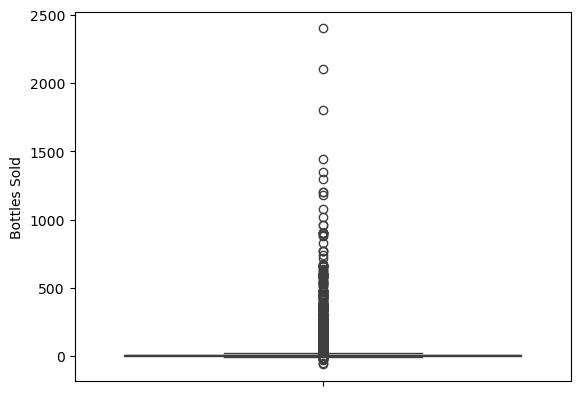

In [114]:
sns.boxplot(iowa["Bottles Sold"])


In [115]:
iowa["Bottles Sold"].describe()

count    159904.000000
mean         10.883336
std          28.042635
min         -60.000000
25%           3.000000
50%           6.000000
75%          12.000000
max        2400.000000
Name: Bottles Sold, dtype: float64

Compared to the sns and describe functions, my functions are accurate outside the quantiles. I am not sure why they are not working. It is likely an issue with how I did my math in the function.

# **5**

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?

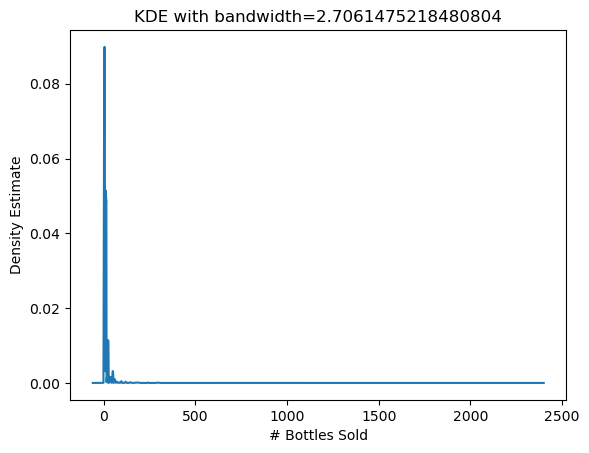

In [135]:
def kde_plot(h, x):
    Z = np.sort(np.unique(x)).reshape(1,-1)
    data=x.to_numpy().reshape(-1,1)
    I= np.abs(data-Z) <=h
    kde=np.mean(I, axis=0)/ (2*h)
    grid=Z.reshape(-1,1)
    plt.plot(grid, kde)
    plt.title(f"KDE with bandwidth={h}")
    plt.xlabel("# Bottles Sold")
    plt.ylabel("Density Estimate")
def get_bandwidth(x):
    std_dev=np.std(x)
    N=len(x)
    h=1.06*std_dev*(N**(-1/5))
    return h
h=get_bandwidth(iowa["Bottles Sold"])
kde_plot(h, iowa["Bottles Sold"])

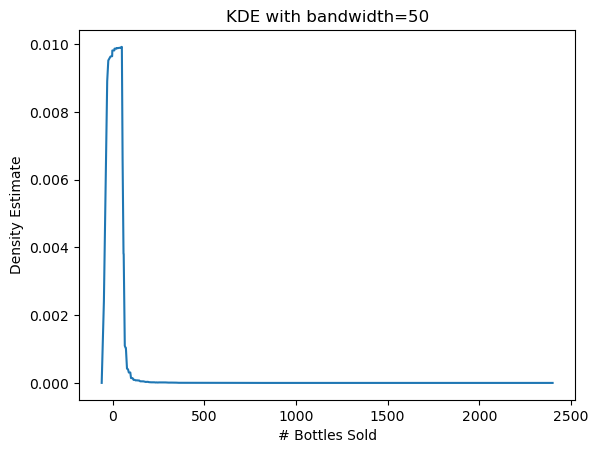

In [136]:
kde_plot(50, iowa["Bottles Sold"])

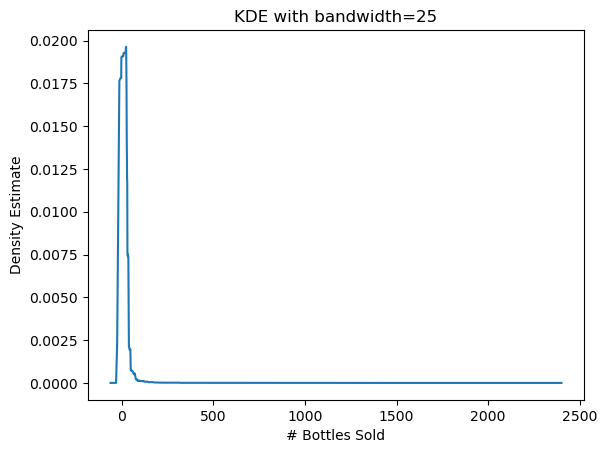

In [137]:
kde_plot(25, iowa["Bottles Sold"])

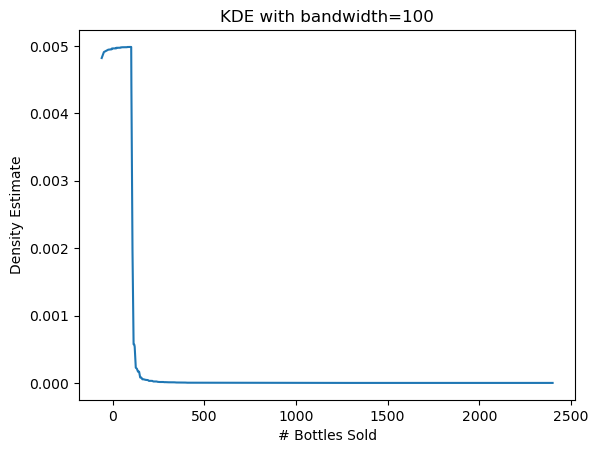

In [138]:
kde_plot(100, iowa["Bottles Sold"])

For the bandwidth created through the function I wrote for h, the KDE appears to overfit the data, while n h=100 seems to underfit the data. A bandwidth of 25 seems to perhaps best represent the data.